# Generating Sign Language Images with DCGAN
## Arda Mavi

### Summary:
Generating sign language images with 'DCGAN' using our own 'Sign Language Dataset'.

#### DCGAN Paper: [arxiv.org/abs/1511.06434](https://arxiv.org/abs/1511.06434)
#### Sign Language Dataset: [github.com/ardamavi/Sign-Language-Digits-Dataset](https://github.com/ardamavi/Sign-Language-Digits-Dataset)

In [1]:
# Import
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Getting Dataset:
from get_dataset import get_dataset
X_train = get_dataset()

Dataset shape: (2062, 64, 64, 1)
2062 sample, 64 x 64 size grayscale image.

Examples:


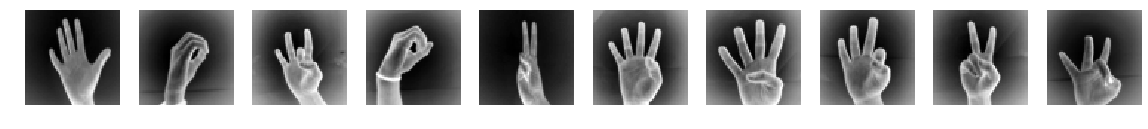

In [3]:
# About Dataset:

img_size = X_train.shape[1] # 64
channel_size = X_train.shape[3] # 1: Grayscale, 3: RGB

print('Dataset shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2] ,'size grayscale image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    # Display data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[np.random.randint(0, X_train.shape[0], 1)].reshape(img_size, img_size))
    plt.gray()
    plt.axis('off')

In [4]:
# Import Deep Learning libraries:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Activation, Lambda, Flatten, concatenate, Reshape
from keras.models import Model
from keras import backend as K

### Generator Architecture:

In [5]:
input_noise = Input(shape=(100,))

G_fc = Dense(256)(input_noise)
G_fc = Activation('relu')(G_fc)

G_fc = Dense(8*8*256)(G_fc)
G_fc = Activation('relu')(G_fc)

G_rs = Reshape((8, 8, 256))(G_fc)

G_layer = UpSampling2D((2, 2))(G_rs)
G_layer = Conv2D(256, (3, 3), activation='relu', padding='same')(G_layer)

G_layer = UpSampling2D((2, 2))(G_layer)
G_layer = Conv2D(128, (3, 3), activation='relu', padding='same')(G_layer)

G_layer = UpSampling2D((2, 2))(G_layer)
G_layer = Conv2D(64, (3, 3), activation='relu', padding='same')(G_layer)

G_output = Conv2D(channel_size, (3, 3), activation='sigmoid', padding='same')(G_layer)


# Compile Generator:

generator = Model(input_noise, G_output)

print('Generator Architecture:')
generator.summary()

Generator Architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16384)             4210688   
_________________________________________________________________
activation_2 (Activation)    (None, 16384)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 256)    

### Discriminator Architecture:

In [6]:
input_img = Input(shape=(img_size, img_size, channel_size))

D_layer = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
D_layer = MaxPooling2D((2, 2))(D_layer)

D_layer = Conv2D(64, (3, 3), activation='relu', padding='same')(D_layer)
D_layer = MaxPooling2D((2, 2))(D_layer)

D_layer = Conv2D(128, (3, 3), activation='relu', padding='same')(D_layer)
D_layer = MaxPooling2D((2, 2))(D_layer)

D_flt = Flatten()(D_layer)

D_fc = Dense(256)(D_flt)
D_fc = Activation('relu')(D_fc)

D_fc = Dense(128)(D_fc)
D_fc = Activation('relu')(D_fc)

D_fc = Dense(1)(D_fc)
D_output = Activation('sigmoid')(D_fc)


# Compile Discriminator:

discriminator = Model(input_img, D_output)
discriminator.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])

print('Discriminator Architecture:')
discriminator.summary()

Discriminator Architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)  

### DCGAN Architecture:

In [7]:
# DCGAN:

input_dcgan = Input(shape=(100,))
generated_img = generator(input_dcgan)
dcgan_output = discriminator(generated_img)

# Compile DCGAN:

dcgan = Model(input_dcgan, dcgan_output)
dcgan.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])

print('DCGAN Architecture:')
dcgan.summary()

DCGAN Architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
model_1 (Model)              (None, 64, 64, 1)         5196033   
_________________________________________________________________
model_2 (Model)              (None, 1)                 2223105   
Total params: 7,419,138
Trainable params: 7,419,138
Non-trainable params: 0
_________________________________________________________________


### Training:



Epoch: 1 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 933us/step - loss: 0.0811 - acc: 0.8817

DCGAN Train:


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:953: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/1
2062/2062 [==============================] - 8s 4ms/step - loss: 0.0010 - acc: 1.0000

Generated Examples:


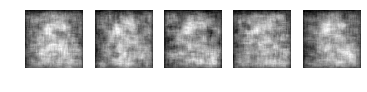



Epoch: 2 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 4.1881e-14 - acc: 1.0000

Generated Examples:


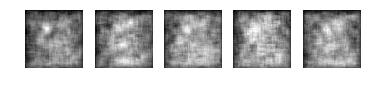



Epoch: 3 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 4.6230e-14 - acc: 1.0000

Generated Examples:


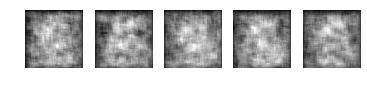



Epoch: 4 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 779us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 5.6016e-14 - acc: 1.0000

Generated Examples:


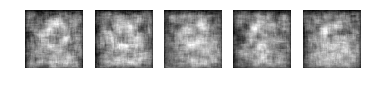



Epoch: 5 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 779us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 7.1468e-14 - acc: 1.0000

Generated Examples:


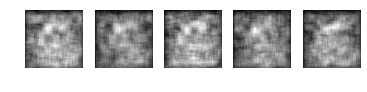



Epoch: 6 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 9.8897e-14 - acc: 1.0000

Generated Examples:


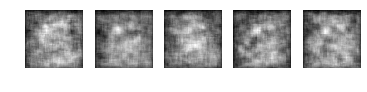



Epoch: 7 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 773us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 1.4804e-13 - acc: 1.0000

Generated Examples:


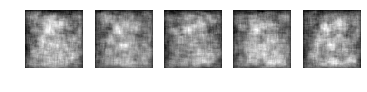



Epoch: 8 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 2.2592e-13 - acc: 1.0000

Generated Examples:


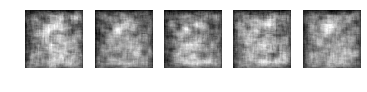



Epoch: 9 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 776us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 4.0562e-13 - acc: 1.0000

Generated Examples:


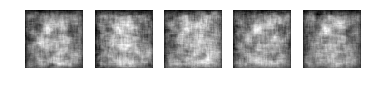



Epoch: 10 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 796us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 9.3932e-13 - acc: 1.0000

Generated Examples:


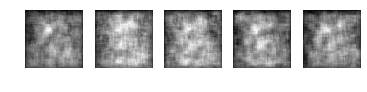



Epoch: 11 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 781us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 3.6982e-12 - acc: 1.0000

Generated Examples:


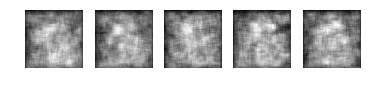



Epoch: 12 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 2.6792e-10 - acc: 1.0000

Generated Examples:


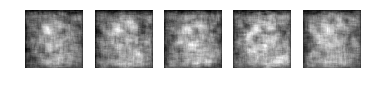



Epoch: 13 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 790us/step - loss: 0.1300 - acc: 0.8695

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0272 - acc: 0.9690

Generated Examples:


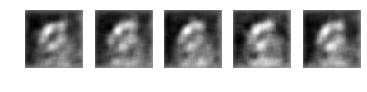



Epoch: 14 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 781us/step - loss: 0.0308 - acc: 0.9675

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0164 - acc: 0.9840

Generated Examples:


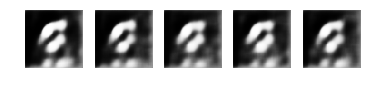



Epoch: 15 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 779us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 2.6687e-11 - acc: 1.0000

Generated Examples:


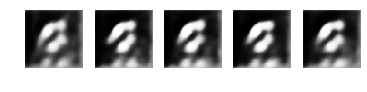



Epoch: 16 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 772us/step - loss: 0.4998 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 3.1046e-04 - acc: 1.0000

Generated Examples:


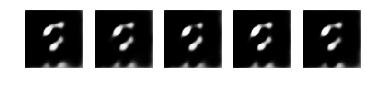



Epoch: 17 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 806us/step - loss: 0.0742 - acc: 0.9113

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0152 - acc: 0.9845

Generated Examples:


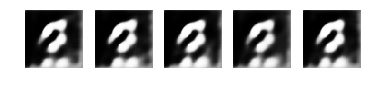



Epoch: 18 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0330 - acc: 0.9656

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0151 - acc: 0.9845

Generated Examples:


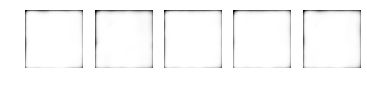



Epoch: 19 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 780us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 3.5527e-13 - acc: 1.0000

Generated Examples:


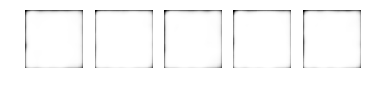



Epoch: 20 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 778us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 9.0949e-13 - acc: 1.0000

Generated Examples:


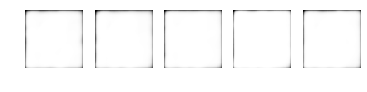



Epoch: 21 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.4609 - acc: 0.5344

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.4986 - acc: 0.4908

Generated Examples:


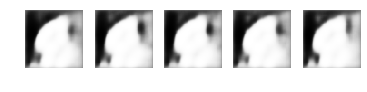



Epoch: 22 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 784us/step - loss: 0.0470 - acc: 0.9394

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0152 - acc: 0.9845

Generated Examples:


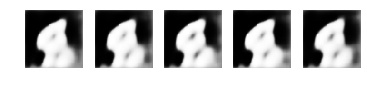



Epoch: 23 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0238 - acc: 0.9738

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0152 - acc: 0.9845

Generated Examples:


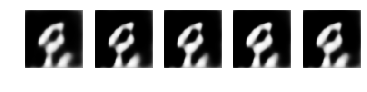



Epoch: 24 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 785us/step - loss: 0.0469 - acc: 0.9500

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0140 - acc: 0.9845

Generated Examples:


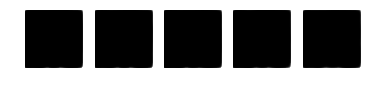



Epoch: 25 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 778us/step - loss: 0.0399 - acc: 0.9583

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0411 - acc: 0.9534

Generated Examples:


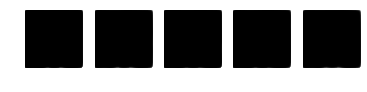



Epoch: 26 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 775us/step - loss: 0.0295 - acc: 0.9631

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0630 - acc: 0.9224

Generated Examples:


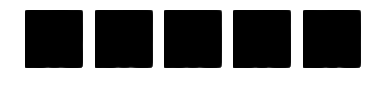



Epoch: 27 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 771us/step - loss: 0.0434 - acc: 0.9505

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0661 - acc: 0.9224

Generated Examples:


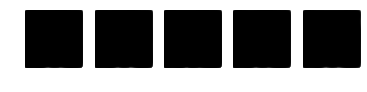



Epoch: 28 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 788us/step - loss: 0.0385 - acc: 0.9573

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0772 - acc: 0.9069

Generated Examples:


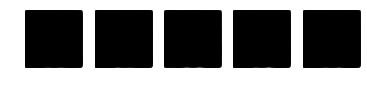



Epoch: 29 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 794us/step - loss: 0.0433 - acc: 0.9515

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0423 - acc: 0.9534

Generated Examples:


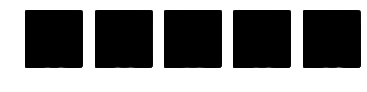



Epoch: 30 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 781us/step - loss: 0.0240 - acc: 0.9753

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0663 - acc: 0.9224

Generated Examples:


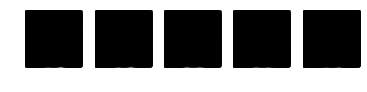



Epoch: 31 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 774us/step - loss: 0.0354 - acc: 0.9549

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0759 - acc: 0.9069

Generated Examples:


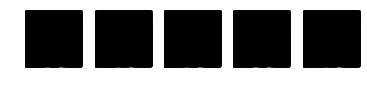



Epoch: 32 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 800us/step - loss: 0.0455 - acc: 0.9437

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0633 - acc: 0.9224

Generated Examples:


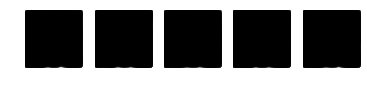



Epoch: 33 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 779us/step - loss: 0.0332 - acc: 0.9578

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0568 - acc: 0.9379

Generated Examples:


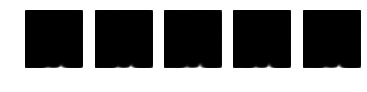



Epoch: 34 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 779us/step - loss: 0.0287 - acc: 0.9636

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0435 - acc: 0.9534

Generated Examples:


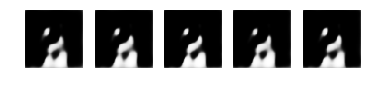



Epoch: 35 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 5.3533e-09 - acc: 1.0000

Generated Examples:


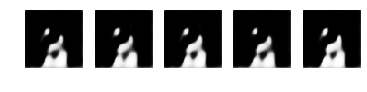



Epoch: 36 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 789us/step - loss: 0.0709 - acc: 0.9297

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0223 - acc: 0.9690

Generated Examples:


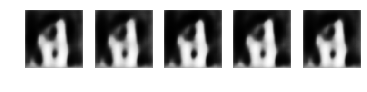



Epoch: 37 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 769us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 1.8871e-11 - acc: 1.0000

Generated Examples:


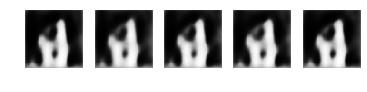



Epoch: 38 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 772us/step - loss: 0.3623 - acc: 0.6372

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0148 - acc: 0.9845

Generated Examples:


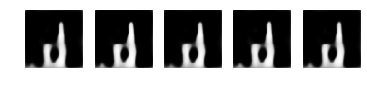



Epoch: 39 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 794us/step - loss: 0.0414 - acc: 0.9578

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


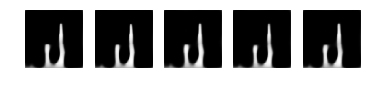



Epoch: 40 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 768us/step - loss: 0.0289 - acc: 0.9694

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0177 - acc: 0.9845

Generated Examples:


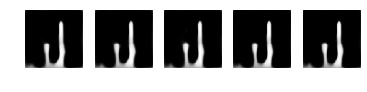



Epoch: 41 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 777us/step - loss: 0.0374 - acc: 0.9578

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0230 - acc: 0.9690

Generated Examples:


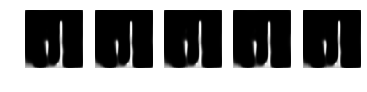



Epoch: 42 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 778us/step - loss: 0.0613 - acc: 0.9365

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0305 - acc: 0.9690

Generated Examples:


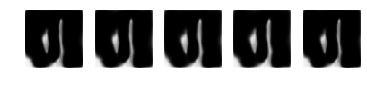



Epoch: 43 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 791us/step - loss: 0.0267 - acc: 0.9685

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0293 - acc: 0.9690

Generated Examples:


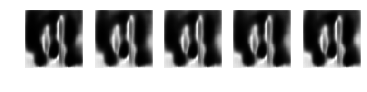



Epoch: 44 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 792us/step - loss: 0.0374 - acc: 0.9617

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0151 - acc: 0.9845

Generated Examples:


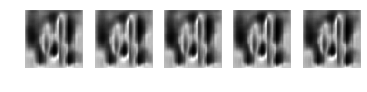



Epoch: 45 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 777us/step - loss: 0.0521 - acc: 0.9403

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


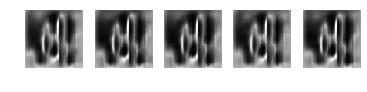



Epoch: 46 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 788us/step - loss: 0.0369 - acc: 0.9593

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


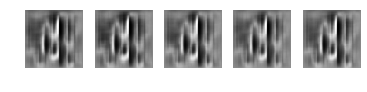



Epoch: 47 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 784us/step - loss: 0.0353 - acc: 0.9597

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


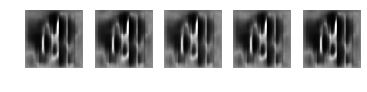



Epoch: 48 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 800us/step - loss: 0.0331 - acc: 0.9597

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


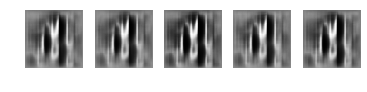



Epoch: 49 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 786us/step - loss: 0.0394 - acc: 0.9564

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


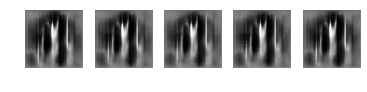



Epoch: 50 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 796us/step - loss: 0.0501 - acc: 0.9442

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


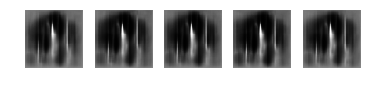



Epoch: 51 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 770us/step - loss: 0.0337 - acc: 0.9646

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0164 - acc: 0.9845

Generated Examples:


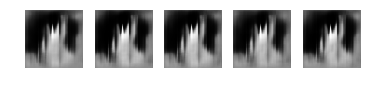



Epoch: 52 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 788us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 2.0959e-11 - acc: 1.0000

Generated Examples:


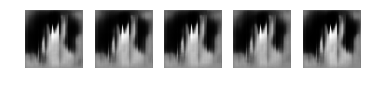



Epoch: 53 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 791us/step - loss: 0.5000 - acc: 0.5000

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 3.3737e-10 - acc: 1.0000

Generated Examples:


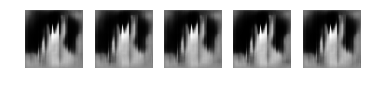



Epoch: 54 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 776us/step - loss: 0.2115 - acc: 0.7876

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0151 - acc: 0.9845

Generated Examples:


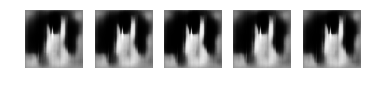



Epoch: 55 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 788us/step - loss: 0.0435 - acc: 0.9573

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


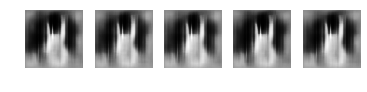



Epoch: 56 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 777us/step - loss: 0.0328 - acc: 0.9656

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


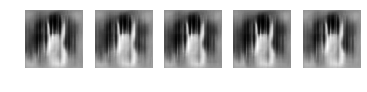



Epoch: 57 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 789us/step - loss: 0.0327 - acc: 0.9670

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


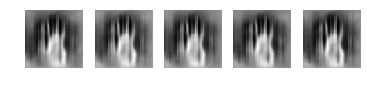



Epoch: 58 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 786us/step - loss: 0.0387 - acc: 0.9578

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


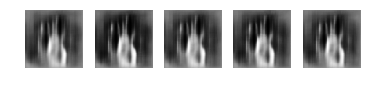



Epoch: 59 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0462 - acc: 0.9491

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0151 - acc: 0.9845

Generated Examples:


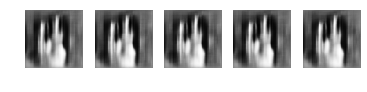



Epoch: 60 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0422 - acc: 0.9564

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0269 - acc: 0.9690

Generated Examples:


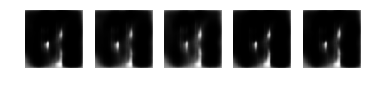



Epoch: 61 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 781us/step - loss: 0.0381 - acc: 0.9578

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0163 - acc: 0.9845

Generated Examples:


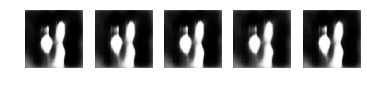



Epoch: 62 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0373 - acc: 0.9602

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


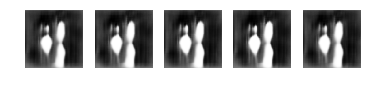



Epoch: 63 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 761us/step - loss: 0.0520 - acc: 0.9418

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0152 - acc: 0.9845

Generated Examples:


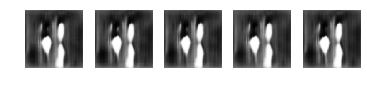



Epoch: 64 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 797us/step - loss: 0.0388 - acc: 0.9597

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0152 - acc: 0.9845

Generated Examples:


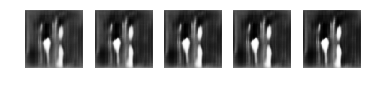



Epoch: 65 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 781us/step - loss: 0.0460 - acc: 0.9471

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


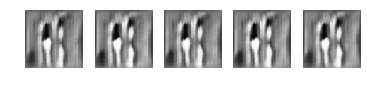



Epoch: 66 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 790us/step - loss: 0.0387 - acc: 0.9564

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0265 - acc: 0.9690

Generated Examples:


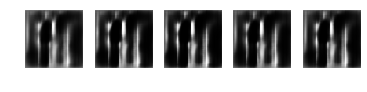



Epoch: 67 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 796us/step - loss: 0.0374 - acc: 0.9588

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0167 - acc: 0.9845

Generated Examples:


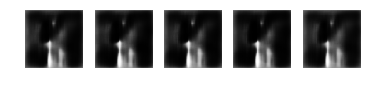



Epoch: 68 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 802us/step - loss: 0.0353 - acc: 0.9602

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


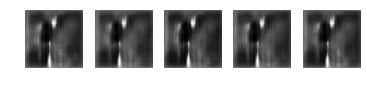



Epoch: 69 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0391 - acc: 0.9573

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


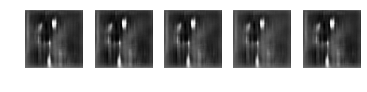



Epoch: 70 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 770us/step - loss: 0.0304 - acc: 0.9690

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


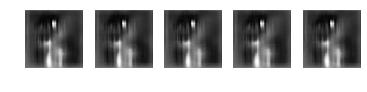



Epoch: 71 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 796us/step - loss: 0.0317 - acc: 0.9670

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0158 - acc: 0.9845

Generated Examples:


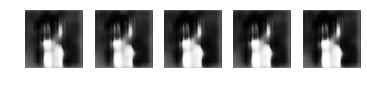



Epoch: 72 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.1377 - acc: 0.8574

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


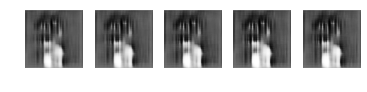



Epoch: 73 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0397 - acc: 0.9549

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


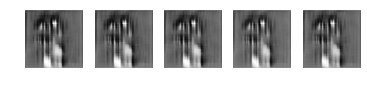



Epoch: 74 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 778us/step - loss: 0.0373 - acc: 0.9602

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


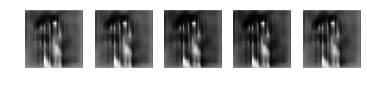



Epoch: 75 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 788us/step - loss: 0.0312 - acc: 0.9680

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


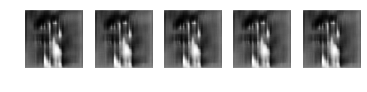



Epoch: 76 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 784us/step - loss: 0.0330 - acc: 0.9631

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


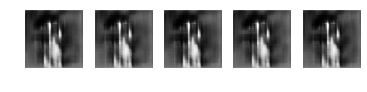



Epoch: 77 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 778us/step - loss: 0.0375 - acc: 0.9583

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


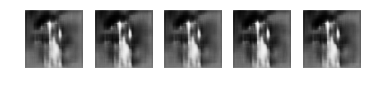



Epoch: 78 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 773us/step - loss: 0.0359 - acc: 0.9602

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


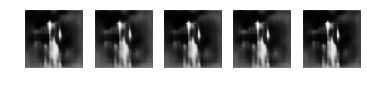



Epoch: 79 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 809us/step - loss: 0.0320 - acc: 0.9646

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


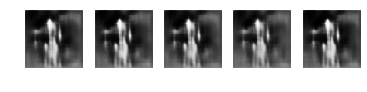



Epoch: 80 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0480 - acc: 0.9491

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


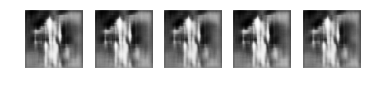



Epoch: 81 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 780us/step - loss: 0.0353 - acc: 0.9602

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


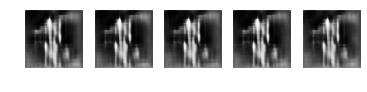



Epoch: 82 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0369 - acc: 0.9593

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


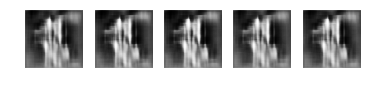



Epoch: 83 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 785us/step - loss: 0.0419 - acc: 0.9564

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


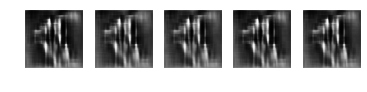



Epoch: 84 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 789us/step - loss: 0.0290 - acc: 0.9719

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


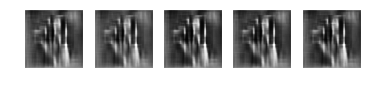



Epoch: 85 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 786us/step - loss: 0.0451 - acc: 0.9549

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


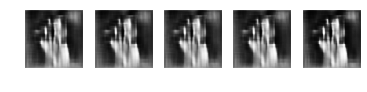



Epoch: 86 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 798us/step - loss: 0.0347 - acc: 0.9641

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


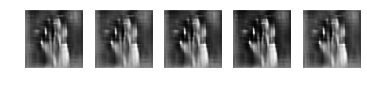



Epoch: 87 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 780us/step - loss: 0.0343 - acc: 0.9646

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


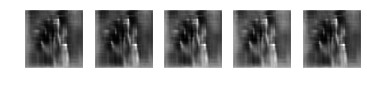



Epoch: 88 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 779us/step - loss: 0.0397 - acc: 0.9559

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


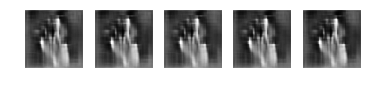



Epoch: 89 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 785us/step - loss: 0.0368 - acc: 0.9593

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


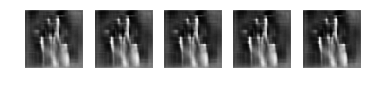



Epoch: 90 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 782us/step - loss: 0.0385 - acc: 0.9593

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


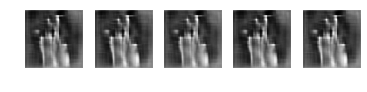



Epoch: 91 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 782us/step - loss: 0.0358 - acc: 0.9641

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0162 - acc: 0.9845

Generated Examples:


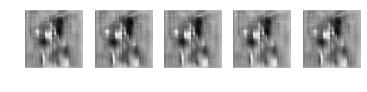



Epoch: 92 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 784us/step - loss: 0.0438 - acc: 0.9486

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


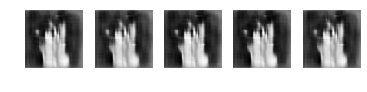



Epoch: 93 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 789us/step - loss: 0.0400 - acc: 0.9588

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


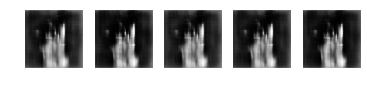



Epoch: 94 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 792us/step - loss: 0.0417 - acc: 0.9578

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


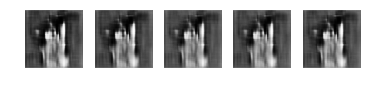



Epoch: 95 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 777us/step - loss: 0.0301 - acc: 0.9699

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0158 - acc: 0.9845

Generated Examples:


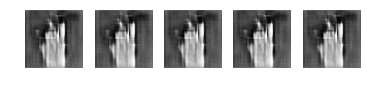



Epoch: 96 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 792us/step - loss: 0.0414 - acc: 0.9549

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0205 - acc: 0.9704

Generated Examples:


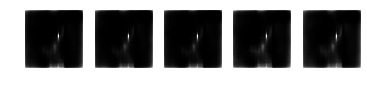



Epoch: 97 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 797us/step - loss: 0.0272 - acc: 0.9680

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0304 - acc: 0.9690

Generated Examples:


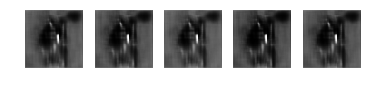



Epoch: 98 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 773us/step - loss: 0.0405 - acc: 0.9544

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


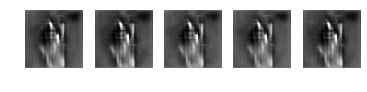



Epoch: 99 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 773us/step - loss: 0.0378 - acc: 0.9568

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


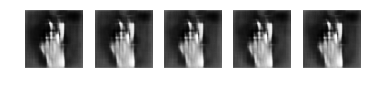



Epoch: 100 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 797us/step - loss: 0.0359 - acc: 0.9607

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


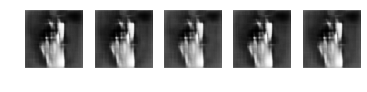



Epoch: 101 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 778us/step - loss: 0.0324 - acc: 0.9680

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


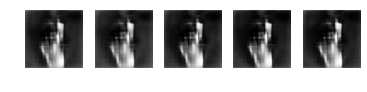



Epoch: 102 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 780us/step - loss: 0.0364 - acc: 0.9641

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


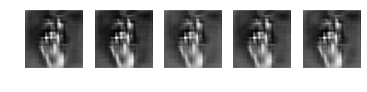



Epoch: 103 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 786us/step - loss: 0.0337 - acc: 0.9675

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


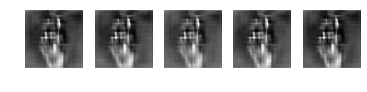



Epoch: 104 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 791us/step - loss: 0.0443 - acc: 0.9534

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


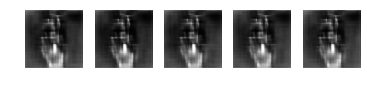



Epoch: 105 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 775us/step - loss: 0.0352 - acc: 0.9622

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


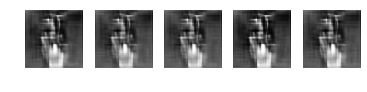



Epoch: 106 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 773us/step - loss: 0.0359 - acc: 0.9593

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


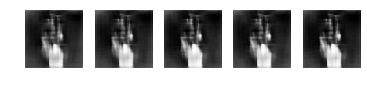



Epoch: 107 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0372 - acc: 0.9597

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


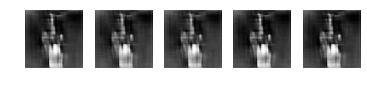



Epoch: 108 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 770us/step - loss: 0.0362 - acc: 0.9622

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


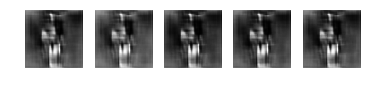



Epoch: 109 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 785us/step - loss: 0.0383 - acc: 0.9573

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0160 - acc: 0.9845

Generated Examples:


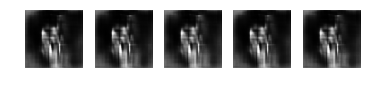



Epoch: 110 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 773us/step - loss: 0.0369 - acc: 0.9612

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


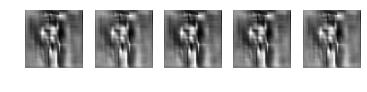



Epoch: 111 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 790us/step - loss: 0.0339 - acc: 0.9641

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0163 - acc: 0.9845

Generated Examples:


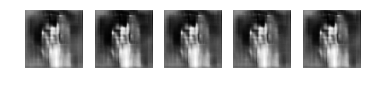



Epoch: 112 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 769us/step - loss: 0.0363 - acc: 0.9612

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


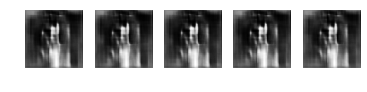



Epoch: 113 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 774us/step - loss: 0.0345 - acc: 0.9627

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


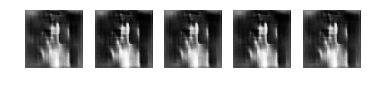



Epoch: 114 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 794us/step - loss: 0.0394 - acc: 0.9544

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


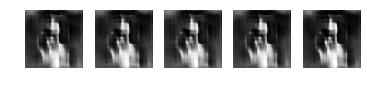



Epoch: 115 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 781us/step - loss: 0.0437 - acc: 0.9544

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


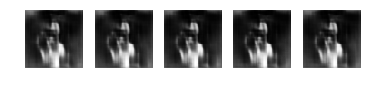



Epoch: 116 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 785us/step - loss: 0.0381 - acc: 0.9597

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


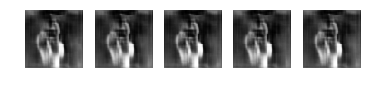



Epoch: 117 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 780us/step - loss: 0.0348 - acc: 0.9622

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0158 - acc: 0.9845

Generated Examples:


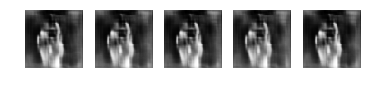



Epoch: 118 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 795us/step - loss: 0.0465 - acc: 0.9505

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


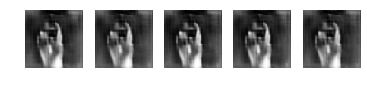



Epoch: 119 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 791us/step - loss: 0.0455 - acc: 0.9491

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


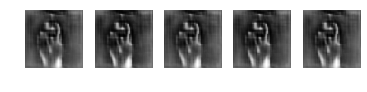



Epoch: 120 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 776us/step - loss: 0.0423 - acc: 0.9554

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0162 - acc: 0.9845

Generated Examples:


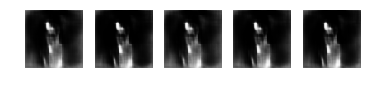



Epoch: 121 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 790us/step - loss: 0.0374 - acc: 0.9578

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


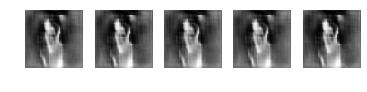



Epoch: 122 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 784us/step - loss: 0.0405 - acc: 0.9564

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


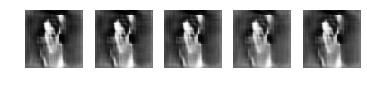



Epoch: 123 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0349 - acc: 0.9636

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


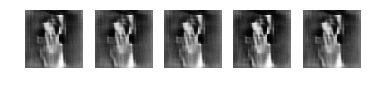



Epoch: 124 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 773us/step - loss: 0.0306 - acc: 0.9694

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


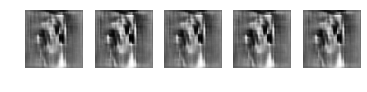



Epoch: 125 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 800us/step - loss: 0.0386 - acc: 0.9564

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


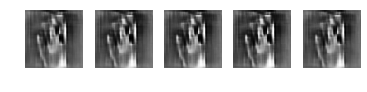



Epoch: 126 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0399 - acc: 0.9578

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


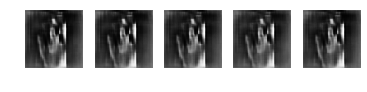



Epoch: 127 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0340 - acc: 0.9617

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


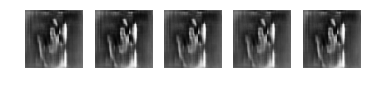



Epoch: 128 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 772us/step - loss: 0.0422 - acc: 0.9559

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0158 - acc: 0.9845

Generated Examples:


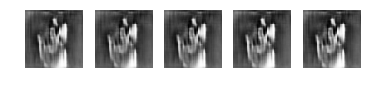



Epoch: 129 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 799us/step - loss: 0.0416 - acc: 0.9549

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


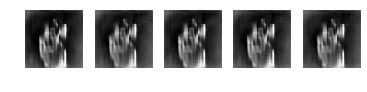



Epoch: 130 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 786us/step - loss: 0.0350 - acc: 0.9627

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


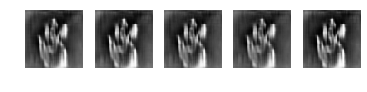



Epoch: 131 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0356 - acc: 0.9602

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


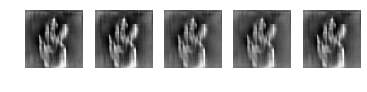



Epoch: 132 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0388 - acc: 0.9564

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


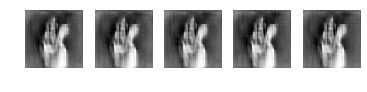



Epoch: 133 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 786us/step - loss: 0.0340 - acc: 0.9646

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


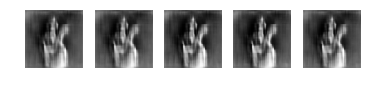



Epoch: 134 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 790us/step - loss: 0.0355 - acc: 0.9583

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


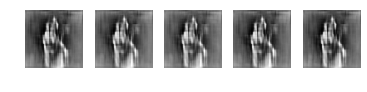



Epoch: 135 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 784us/step - loss: 0.0497 - acc: 0.9433

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


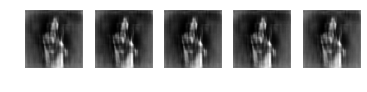



Epoch: 136 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 788us/step - loss: 0.0406 - acc: 0.9573

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


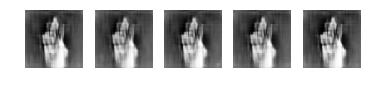



Epoch: 137 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 772us/step - loss: 0.0314 - acc: 0.9675

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


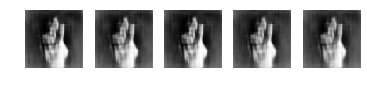



Epoch: 138 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 771us/step - loss: 0.0416 - acc: 0.9554

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


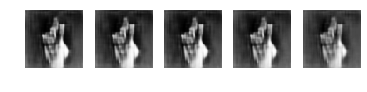



Epoch: 139 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 776us/step - loss: 0.0354 - acc: 0.9636

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


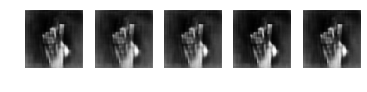



Epoch: 140 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 794us/step - loss: 0.0342 - acc: 0.9651

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


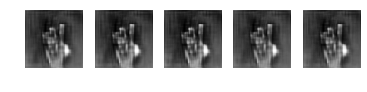



Epoch: 141 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 776us/step - loss: 0.0414 - acc: 0.9544

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


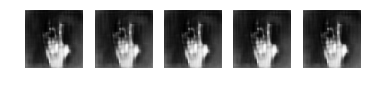



Epoch: 142 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 781us/step - loss: 0.0370 - acc: 0.9612

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


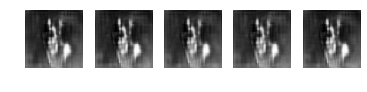



Epoch: 143 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 784us/step - loss: 0.0420 - acc: 0.9564

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


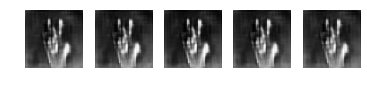



Epoch: 144 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0324 - acc: 0.9675

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


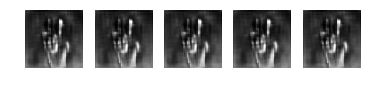



Epoch: 145 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 780us/step - loss: 0.0341 - acc: 0.9656

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


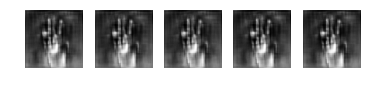



Epoch: 146 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 775us/step - loss: 0.0386 - acc: 0.9578

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


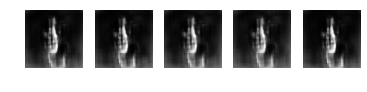



Epoch: 147 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 801us/step - loss: 0.0388 - acc: 0.9583

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


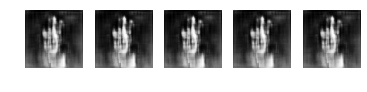



Epoch: 148 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 775us/step - loss: 0.0327 - acc: 0.9661

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


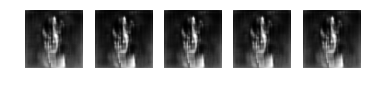



Epoch: 149 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 785us/step - loss: 0.0329 - acc: 0.9646

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0158 - acc: 0.9845

Generated Examples:


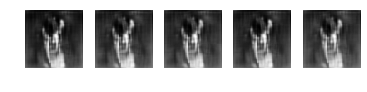



Epoch: 150 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 779us/step - loss: 0.0425 - acc: 0.9525

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


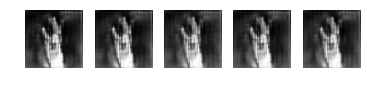



Epoch: 151 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 791us/step - loss: 0.0488 - acc: 0.9491

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


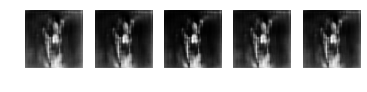



Epoch: 152 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 779us/step - loss: 0.0440 - acc: 0.9505

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0152 - acc: 0.9845

Generated Examples:


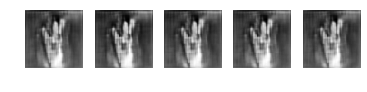



Epoch: 153 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0362 - acc: 0.9622

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


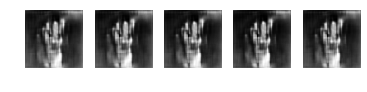



Epoch: 154 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 799us/step - loss: 0.0386 - acc: 0.9583

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


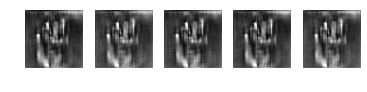



Epoch: 155 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 774us/step - loss: 0.0382 - acc: 0.9612

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0158 - acc: 0.9845

Generated Examples:


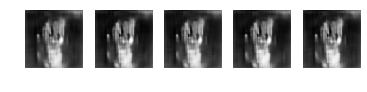



Epoch: 156 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 780us/step - loss: 0.0387 - acc: 0.9568

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


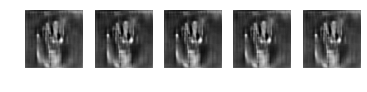



Epoch: 157 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 779us/step - loss: 0.0392 - acc: 0.9549

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


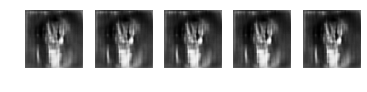



Epoch: 158 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 789us/step - loss: 0.0476 - acc: 0.9481

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0157 - acc: 0.9845

Generated Examples:


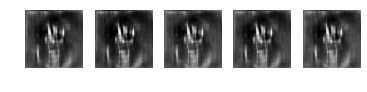



Epoch: 159 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 785us/step - loss: 0.0410 - acc: 0.9539

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0163 - acc: 0.9845

Generated Examples:


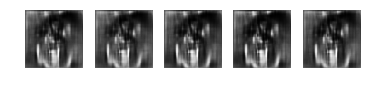



Epoch: 160 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 773us/step - loss: 0.0408 - acc: 0.9559

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0195 - acc: 0.9753

Generated Examples:


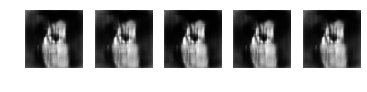



Epoch: 161 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 789us/step - loss: 0.0286 - acc: 0.9694

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0176 - acc: 0.9845

Generated Examples:


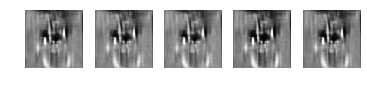



Epoch: 162 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 790us/step - loss: 0.0320 - acc: 0.9675

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0257 - acc: 0.9690

Generated Examples:


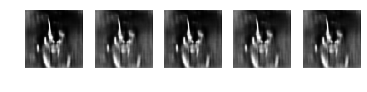



Epoch: 163 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0339 - acc: 0.9641

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0189 - acc: 0.9772

Generated Examples:


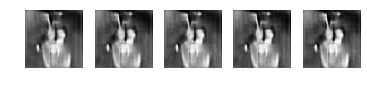



Epoch: 164 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0311 - acc: 0.9636

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


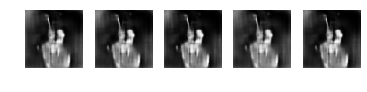



Epoch: 165 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 790us/step - loss: 0.0309 - acc: 0.9675

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0159 - acc: 0.9845

Generated Examples:


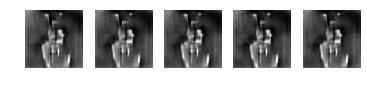



Epoch: 166 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 792us/step - loss: 0.0354 - acc: 0.9636

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0162 - acc: 0.9845

Generated Examples:


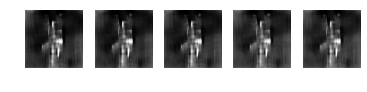



Epoch: 167 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 780us/step - loss: 0.0356 - acc: 0.9617

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0160 - acc: 0.9845

Generated Examples:


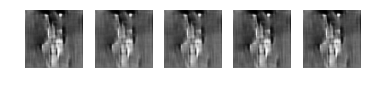



Epoch: 168 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 776us/step - loss: 0.0336 - acc: 0.9656

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


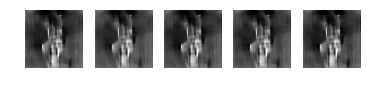



Epoch: 169 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0362 - acc: 0.9627

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0172 - acc: 0.9845

Generated Examples:


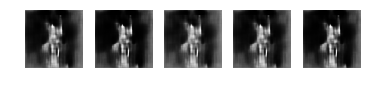



Epoch: 170 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 777us/step - loss: 0.0277 - acc: 0.9685

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0235 - acc: 0.9704

Generated Examples:


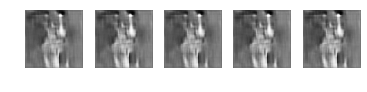



Epoch: 171 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 779us/step - loss: 0.0283 - acc: 0.9690

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0281 - acc: 0.9690

Generated Examples:


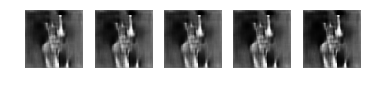



Epoch: 172 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 793us/step - loss: 0.0321 - acc: 0.9656

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0163 - acc: 0.9845

Generated Examples:


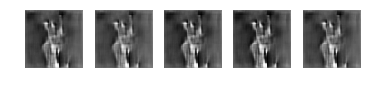



Epoch: 173 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 791us/step - loss: 0.0355 - acc: 0.9597

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


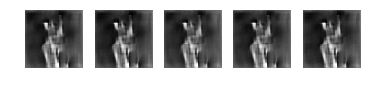



Epoch: 174 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 767us/step - loss: 0.0335 - acc: 0.9631

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


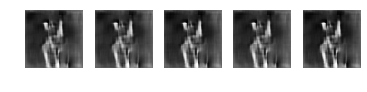



Epoch: 175 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0335 - acc: 0.9593

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


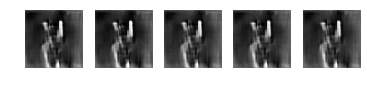



Epoch: 176 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 778us/step - loss: 0.0475 - acc: 0.9496

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0163 - acc: 0.9845

Generated Examples:


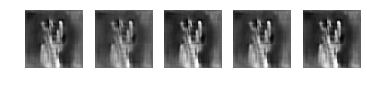



Epoch: 177 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 784us/step - loss: 0.0474 - acc: 0.9437

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


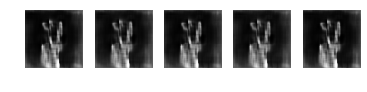



Epoch: 178 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 784us/step - loss: 0.0325 - acc: 0.9636

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0161 - acc: 0.9845

Generated Examples:


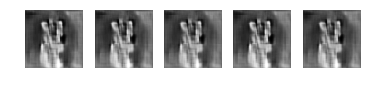



Epoch: 179 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 772us/step - loss: 0.0367 - acc: 0.9578

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


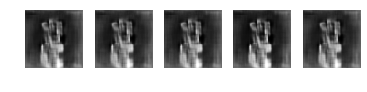



Epoch: 180 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 784us/step - loss: 0.0395 - acc: 0.9573

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


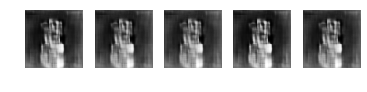



Epoch: 181 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 770us/step - loss: 0.0412 - acc: 0.9520

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


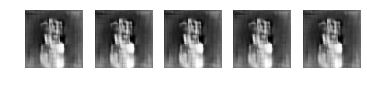



Epoch: 182 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 780us/step - loss: 0.0387 - acc: 0.9578

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


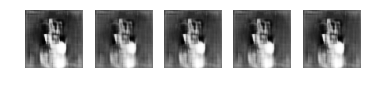



Epoch: 183 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 791us/step - loss: 0.0507 - acc: 0.9471

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0158 - acc: 0.9845

Generated Examples:


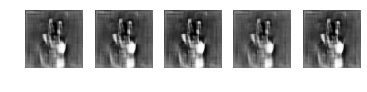



Epoch: 184 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 788us/step - loss: 0.0440 - acc: 0.9530

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


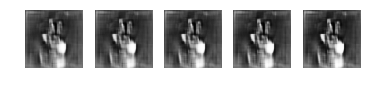



Epoch: 185 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 786us/step - loss: 0.0328 - acc: 0.9656

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0161 - acc: 0.9845

Generated Examples:


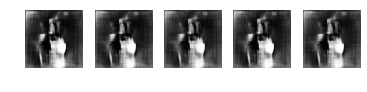



Epoch: 186 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 776us/step - loss: 0.0439 - acc: 0.9530

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0242 - acc: 0.9690

Generated Examples:


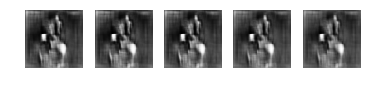



Epoch: 187 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 790us/step - loss: 0.0296 - acc: 0.9665

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0165 - acc: 0.9845

Generated Examples:


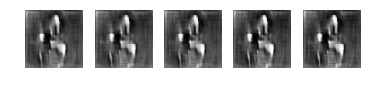



Epoch: 188 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0318 - acc: 0.9636

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0159 - acc: 0.9845

Generated Examples:


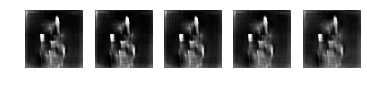



Epoch: 189 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0287 - acc: 0.9704

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0178 - acc: 0.9821

Generated Examples:


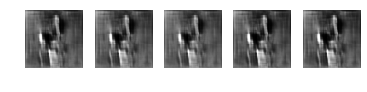



Epoch: 190 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0322 - acc: 0.9617

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0275 - acc: 0.9690

Generated Examples:


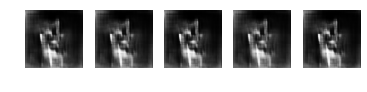



Epoch: 191 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0372 - acc: 0.9564

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0160 - acc: 0.9845

Generated Examples:


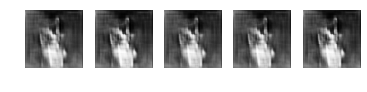



Epoch: 192 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 770us/step - loss: 0.0404 - acc: 0.9544

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


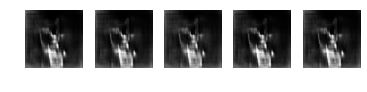



Epoch: 193 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 784us/step - loss: 0.0394 - acc: 0.9573

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0160 - acc: 0.9845

Generated Examples:


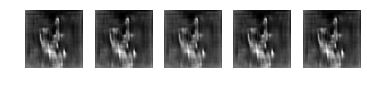



Epoch: 194 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 795us/step - loss: 0.0358 - acc: 0.9597

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0160 - acc: 0.9845

Generated Examples:


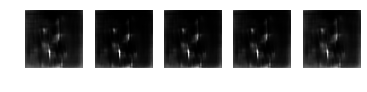



Epoch: 195 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 769us/step - loss: 0.0364 - acc: 0.9583

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0167 - acc: 0.9845

Generated Examples:


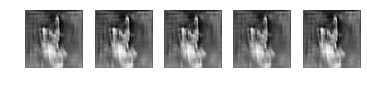



Epoch: 196 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 780us/step - loss: 0.0305 - acc: 0.9690

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0168 - acc: 0.9845

Generated Examples:


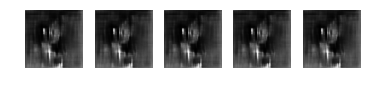



Epoch: 197 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 775us/step - loss: 0.0388 - acc: 0.9588

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0227 - acc: 0.9699

Generated Examples:


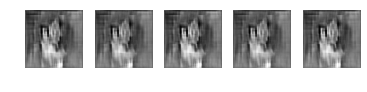



Epoch: 198 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 786us/step - loss: 0.0300 - acc: 0.9651

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0231 - acc: 0.9704

Generated Examples:


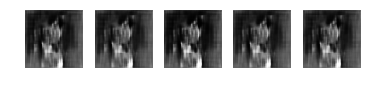



Epoch: 199 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 785us/step - loss: 0.0303 - acc: 0.9651

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0247 - acc: 0.9690

Generated Examples:


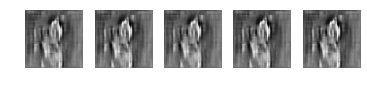



Epoch: 200 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 773us/step - loss: 0.0266 - acc: 0.9709

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0174 - acc: 0.9835

Generated Examples:


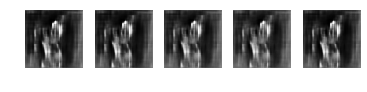



Epoch: 201 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 785us/step - loss: 0.0305 - acc: 0.9665

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0159 - acc: 0.9845

Generated Examples:


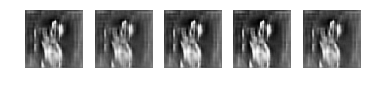



Epoch: 202 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 781us/step - loss: 0.0313 - acc: 0.9646

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


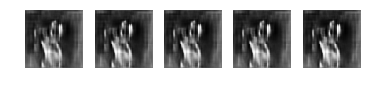



Epoch: 203 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 788us/step - loss: 0.0378 - acc: 0.9568

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0157 - acc: 0.9845

Generated Examples:


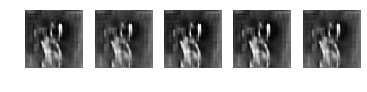



Epoch: 204 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 785us/step - loss: 0.0380 - acc: 0.9588

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0167 - acc: 0.9845

Generated Examples:


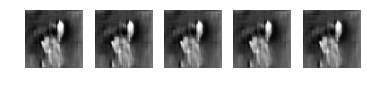



Epoch: 205 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 794us/step - loss: 0.0384 - acc: 0.9588

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0170 - acc: 0.9845

Generated Examples:


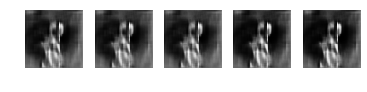



Epoch: 206 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 771us/step - loss: 0.0316 - acc: 0.9661

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0291 - acc: 0.9690

Generated Examples:


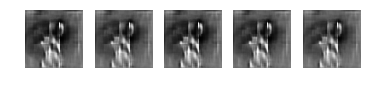



Epoch: 207 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 782us/step - loss: 0.0263 - acc: 0.9709

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0173 - acc: 0.9845

Generated Examples:


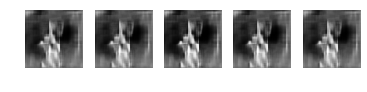



Epoch: 208 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 781us/step - loss: 0.0297 - acc: 0.9651

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0189 - acc: 0.9782

Generated Examples:


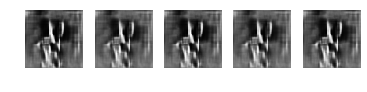



Epoch: 209 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 786us/step - loss: 0.0313 - acc: 0.9685

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0262 - acc: 0.9690

Generated Examples:


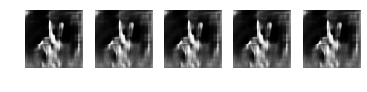



Epoch: 210 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 784us/step - loss: 0.0209 - acc: 0.9748

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0297 - acc: 0.9690

Generated Examples:


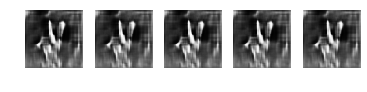



Epoch: 211 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 778us/step - loss: 0.0252 - acc: 0.9762

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0243 - acc: 0.9690

Generated Examples:


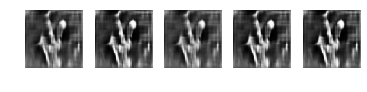



Epoch: 212 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 796us/step - loss: 0.0281 - acc: 0.9714

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0248 - acc: 0.9690

Generated Examples:


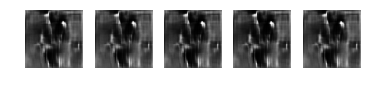



Epoch: 213 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 796us/step - loss: 0.0303 - acc: 0.9690

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0291 - acc: 0.9690

Generated Examples:


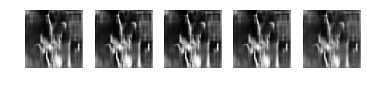



Epoch: 214 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 781us/step - loss: 0.0268 - acc: 0.9680

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0250 - acc: 0.9690

Generated Examples:


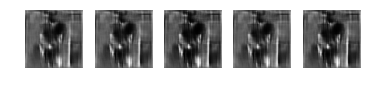



Epoch: 215 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 780us/step - loss: 0.0270 - acc: 0.9719

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0272 - acc: 0.9690

Generated Examples:


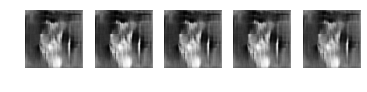



Epoch: 216 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 793us/step - loss: 0.0317 - acc: 0.9661

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0231 - acc: 0.9699

Generated Examples:


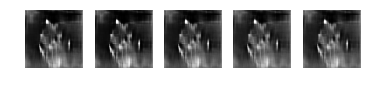



Epoch: 217 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 767us/step - loss: 0.0505 - acc: 0.9496

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0286 - acc: 0.9690

Generated Examples:


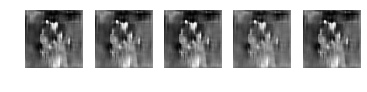



Epoch: 218 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 771us/step - loss: 0.0300 - acc: 0.9656

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0180 - acc: 0.9845

Generated Examples:


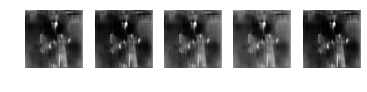



Epoch: 219 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 803us/step - loss: 0.0496 - acc: 0.9491

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0157 - acc: 0.9845

Generated Examples:


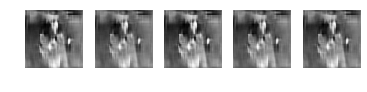



Epoch: 220 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0354 - acc: 0.9602

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


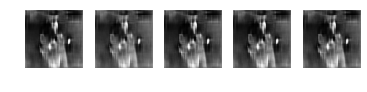



Epoch: 221 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 789us/step - loss: 0.0351 - acc: 0.9651

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0164 - acc: 0.9845

Generated Examples:


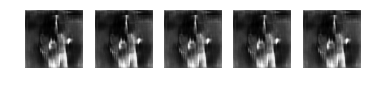



Epoch: 222 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 774us/step - loss: 0.0359 - acc: 0.9622

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0150 - acc: 0.9845

Generated Examples:


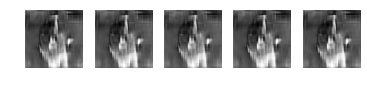



Epoch: 223 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 786us/step - loss: 0.0300 - acc: 0.9690

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0159 - acc: 0.9845

Generated Examples:


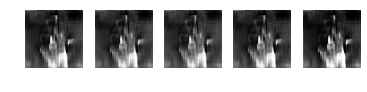



Epoch: 224 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 772us/step - loss: 0.0587 - acc: 0.9418

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0157 - acc: 0.9845

Generated Examples:


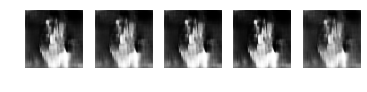



Epoch: 225 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 780us/step - loss: 0.0568 - acc: 0.9418

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


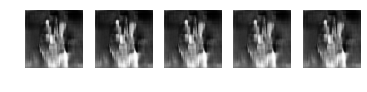



Epoch: 226 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 795us/step - loss: 0.0308 - acc: 0.9680

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


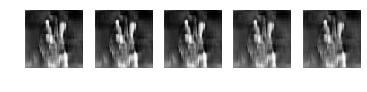



Epoch: 227 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 781us/step - loss: 0.0288 - acc: 0.9714

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


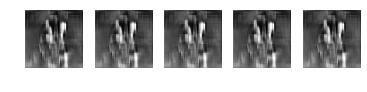



Epoch: 228 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 788us/step - loss: 0.0371 - acc: 0.9622

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


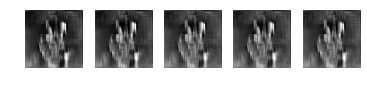



Epoch: 229 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 776us/step - loss: 0.0351 - acc: 0.9607

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


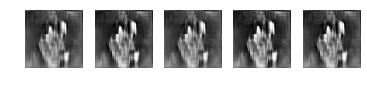



Epoch: 230 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0481 - acc: 0.9491

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


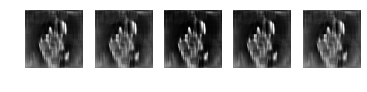



Epoch: 231 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 799us/step - loss: 0.0326 - acc: 0.9651

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0158 - acc: 0.9845

Generated Examples:


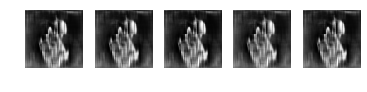



Epoch: 232 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 790us/step - loss: 0.0344 - acc: 0.9631

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


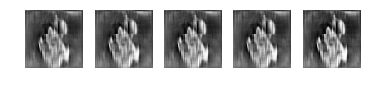



Epoch: 233 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 768us/step - loss: 0.0312 - acc: 0.9661

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


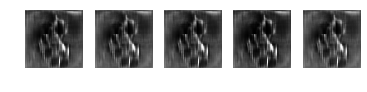



Epoch: 234 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 807us/step - loss: 0.0391 - acc: 0.9602

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


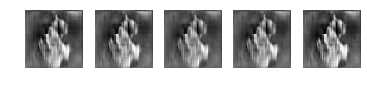



Epoch: 235 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 776us/step - loss: 0.0320 - acc: 0.9675

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


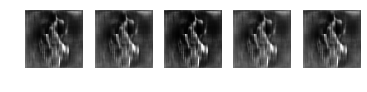



Epoch: 236 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 771us/step - loss: 0.0314 - acc: 0.9670

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


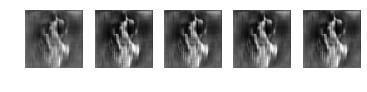



Epoch: 237 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0321 - acc: 0.9646

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0165 - acc: 0.9845

Generated Examples:


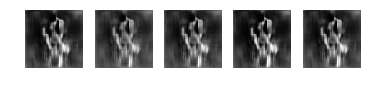



Epoch: 238 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 791us/step - loss: 0.0396 - acc: 0.9583

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0160 - acc: 0.9845

Generated Examples:


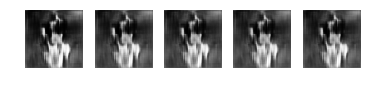



Epoch: 239 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 782us/step - loss: 0.0412 - acc: 0.9588

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


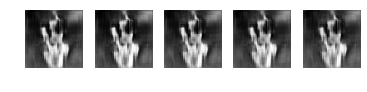



Epoch: 240 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 781us/step - loss: 0.0312 - acc: 0.9694

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


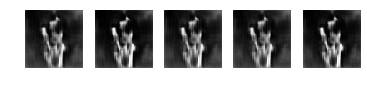



Epoch: 241 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 797us/step - loss: 0.0325 - acc: 0.9675

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0156 - acc: 0.9845

Generated Examples:


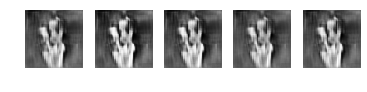



Epoch: 242 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0419 - acc: 0.9559

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0152 - acc: 0.9845

Generated Examples:


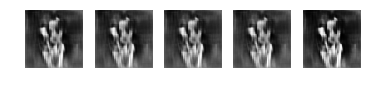



Epoch: 243 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 777us/step - loss: 0.0338 - acc: 0.9636

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0158 - acc: 0.9845

Generated Examples:


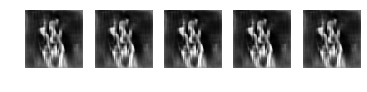



Epoch: 244 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 774us/step - loss: 0.0334 - acc: 0.9656

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0157 - acc: 0.9845

Generated Examples:


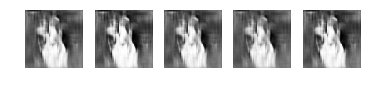



Epoch: 245 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 787us/step - loss: 0.0386 - acc: 0.9578

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


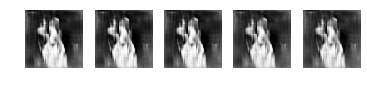



Epoch: 246 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 780us/step - loss: 0.0308 - acc: 0.9651

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0155 - acc: 0.9845

Generated Examples:


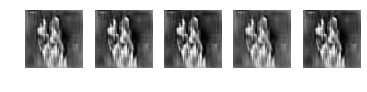



Epoch: 247 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 785us/step - loss: 0.0455 - acc: 0.9539

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0158 - acc: 0.9845

Generated Examples:


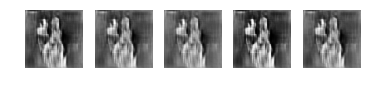



Epoch: 248 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 788us/step - loss: 0.0544 - acc: 0.9447

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0154 - acc: 0.9845

Generated Examples:


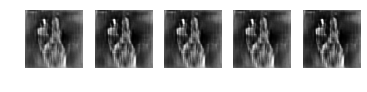



Epoch: 249 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 785us/step - loss: 0.0371 - acc: 0.9636

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0180 - acc: 0.9845

Generated Examples:


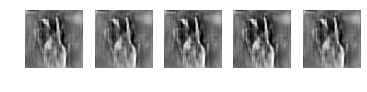



Epoch: 250 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 790us/step - loss: 0.0654 - acc: 0.9292

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0153 - acc: 0.9845

Generated Examples:


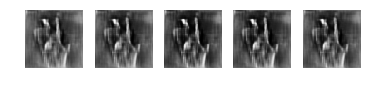



Epoch: 251 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 777us/step - loss: 0.0330 - acc: 0.9636

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0172 - acc: 0.9845

Generated Examples:


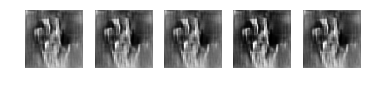



Epoch: 252 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 794us/step - loss: 0.0604 - acc: 0.9389

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0160 - acc: 0.9845

Generated Examples:


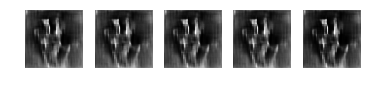



Epoch: 253 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0339 - acc: 0.9622

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0222 - acc: 0.9719

Generated Examples:


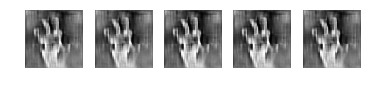



Epoch: 254 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 783us/step - loss: 0.0251 - acc: 0.9748

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0159 - acc: 0.9845

Generated Examples:


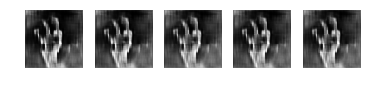



Epoch: 255 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 782us/step - loss: 0.0397 - acc: 0.9573

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0212 - acc: 0.9709

Generated Examples:


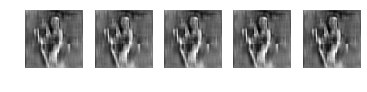



Epoch: 256 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 775us/step - loss: 0.0363 - acc: 0.9583

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0158 - acc: 0.9840

Generated Examples:


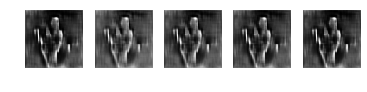



Epoch: 257 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 786us/step - loss: 0.0358 - acc: 0.9607

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0172 - acc: 0.9845

Generated Examples:


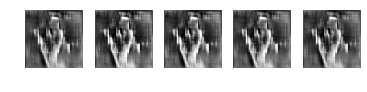



Epoch: 258 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 775us/step - loss: 0.0343 - acc: 0.9641

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0193 - acc: 0.9777

Generated Examples:


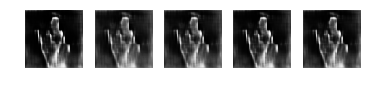



Epoch: 259 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 781us/step - loss: 0.0262 - acc: 0.9728

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0281 - acc: 0.9690

Generated Examples:


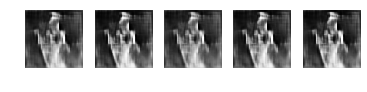



Epoch: 260 / 260

Discriminator Train:
Epoch 1/1
2062/2062 [==============================] - 2s 775us/step - loss: 0.0265 - acc: 0.9743

DCGAN Train:
Epoch 1/1
2062/2062 [==============================] - 7s 3ms/step - loss: 0.0241 - acc: 0.9690

Generated Examples:


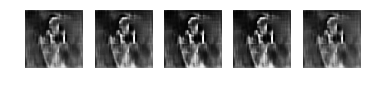

In [8]:
epochs = 300
train_data_size = int(X_train.shape[0]/2)

for epoch in range(epochs):
  
    print('\n\nEpoch:', epoch+1, '/', epochs)
    
    # Discriminator Training:
    
    # Getting real batch:
    real_imgs_indexes = np.random.randint(0, X_train.shape[0], train_data_size)
    real_imgs = X_train[real_imgs_indexes]
    
    # Getting generated batch:
    noise = np.random.normal(0, 1, (train_data_size, 100))
    generator_imgs = generator.predict(noise)
    
    # Getting batch:
    dis_batch = np.concatenate((real_imgs, generator_imgs), axis=0)
    dis_batch_Y = np.concatenate((np.ones((train_data_size, 1)), np.zeros((train_data_size, 1))), axis=0)
    
    discriminator.trainable = True
    print('\nDiscriminator Train:')
    discriminator.fit(dis_batch, dis_batch_Y, batch_size=32, epochs=1, shuffle=True)
    
    
    # Generator Training:
    
    noise = np.random.normal(0, 1, (train_data_size*2, 100))
    
    gen_batch_Y = np.ones((train_data_size*2, 1))
    
    discriminator.trainable = False
    print('\nDCGAN Train:')
    dcgan.fit(noise, gen_batch_Y, batch_size=32, epochs=1, shuffle=True)
    
    print('\nGenerated Examples:')
    n = 5
    plt.figure(figsize=(6, 4))
    for i in range(1, n+1):
        ax = plt.subplot(1, n, i)
        noise = np.random.normal(0, 1, (1, 100))
        plt.imshow(generator.predict(noise).reshape(img_size, img_size))
        plt.gray()
        plt.axis('off')
    plt.show()

### Save and get  models functions:

In [9]:
# Save Models:
def save_models(dcgan, generator, discriminator):
    
    if not os.path.exists('Data/Models/'):
        os.makedirs('Data/Models/')
        
    model_json = dcgan.to_json()
    with open("Data/Models/dcgan_model.json", "w") as model_file:
        model_file.write(model_json)
    dcgan.save_weights("Data/Models/dcgan_weights.h5")
    
    model_json = generator.to_json()
    with open("Data/Models/generator_model.json", "w") as model_file:
        model_file.write(model_json)
    generator.save_weights("Data/Models/generator_weights.h5")
    
    model_json = discriminator.to_json()
    with open("Data/Models/discriminator_model.json", "w") as model_file:
        model_file.write(model_json)
    discriminator.save_weights("Data/Models/discriminator_weights.h5")
    
    print('Models and weights saved')
    return



# Get Models:
from keras.models import model_from_json

def get_models():
    with open('Data/Models/dcgan_model.json', 'r') as model_file:
        dcgan = model_from_json(model_file.read())
    dcgan.load_weights("Data/Models/dcgan_weights.h5")

    with open('Data/Models/generator_model.json', 'r') as model_file:
        generator = model_from_json(model_file.read())
    generator.load_weights("Data/Models/generator_weights.h5")

    with open('Data/Models/discriminator_model.json', 'r') as model_file:
        discriminator = model_from_json(model_file.read())
    discriminator.load_weights("Data/Models/discriminator_weights.h5")
    return dcgan, generator, discriminator

In [10]:
# Save models:
save_models(dcgan, generator, discriminator)

Models and weights saved


In [11]:
dcgan, generator, discriminator = get_models()

Generated Examples:


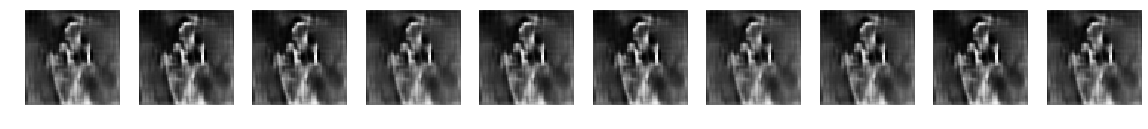

In [12]:
print('Generated Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    noise = K.variable(np.random.normal(0, 1, (1, 100)))
    exmpl_gen_img = K.eval(generator(noise))
    plt.imshow(exmpl_gen_img.reshape(img_size, img_size))
    plt.gray()
    plt.axis('off')
plt.show()